In [ ]:
import torch
import matplotlib.pyplot as plt 


from bliss.datasets.lsst import get_default_lsst_background, convert_mag_to_flux, get_default_lsst_psf
from bliss.reporting import get_snr
from bliss.datasets.galsim_blends import _render_one_star


# Create SNR vs mag diagram for stars

In [ ]:
bg =get_default_lsst_background()
bg = torch.full((1, 1, 100, 100), bg)

mags = torch.arange(14, 28.0, 0.1)
fluxes = convert_mag_to_flux(mags)
stars = [_render_one_star(get_default_lsst_psf(), f, 100) for f in fluxes]
snrs = [get_snr(star.unsqueeze(0), bg) for star in stars]
snrs = torch.tensor(snrs).reshape(-1)

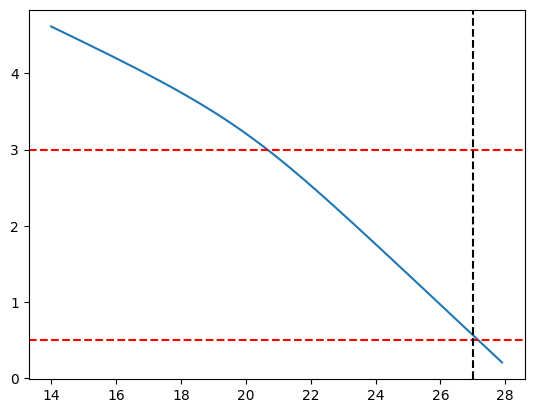

In [ ]:
plt.plot(mags, snrs.log10())
plt.axhline(3, color='r', linestyle='--')
plt.axhline(0.5, color='r', linestyle='--')
plt.axvline(27.0, color='k', linestyle='--')